# Libraries

In [72]:
import polars as pl # Memory? What is that? We borrow.
import pandas as pd # Pandas for some of the libraries that doesn't support polars.
import matplotlib.pyplot as plt # For visualizing.
import math # For the built in math functions.
import seaborn as sns # For visualizing.
import numpy as np # For linear algebra.
import pandas_market_calendars as mcal # For accurate trading days.
from pandas.plotting import autocorrelation_plot # ACF plot.
import time

from scipy import stats # Statistics
from scipy.stats import boxcox # Box-Cox transformation.

# For scoring.
from sklearn.metrics import mean_squared_error

# For ARCH/GARCH models.
from arch.univariate import arch_model

# For seasonal unit root testing.
from pmdarima.arima import OCSBTest, CHTest

# Statsmodels for statistical analysis and forecasting.
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_lm
from statsmodels.datasets import get_rdataset

# Jormund: Personal library.
import jormund.tsa.visualise.base_visualization as jbv # Basic visualization tools for tsa
import jormund.analysis.residual_analysis as ja # Basic visualization tools for residuals
from jormund.tsa.tests.seasonal_trend import hegy_test # Personal hegy test.

from jormund.mpl_config import setup_plots
setup_plots() # To make the graphs look better.

import gc # garbage collection.

# To ignore the annoying warnings.
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Time Series Data:

In [2]:
production_rate = [
    # 1970
    -2.45270031, -0.55152509, -0.35870786, -2.18545486,
    # 1971
    1.90973412,  0.90153584,  0.30801942,  2.29130441,
    # 1972
    4.14957387,  1.89062398,  1.27335290,  3.43689207,
    # 1973
    2.79907636,  0.81768862,  0.86899693,  1.47296187,
    # 1974
    -0.88248358,  0.07427919, -0.41314971, -4.06411893,
    # 1975
    -6.85103912, -1.33129558,  2.42435972,  2.16904208,
    # 1976
    3.02720471,  1.27881101,  1.30386487,  1.77537765,
    # 1977
    2.05516067,  3.05838507,  1.10308888,  0.63346850,
    # 1978
    -0.29339056,  3.94815264,  0.87114701,  1.78447991,
    # 1979
     0.42594327, -0.20491944, -0.29723637,  0.33560928,
    # 1980
     0.41056141, -4.30076832, -1.64181977,  3.78045520,
    # 1981
     0.24627687,  0.30977573,  0.91707444, -2.25457797,
    # 1982
    -2.07131293, -1.24766384, -1.40050430, -1.90375664,
    # 1983
     1.14655720,  2.17942248,  3.36771897,  2.58168445,
    # 1984
     2.89709545,  1.53821324,  0.72128740,  0.04115557,
    # 1985
     0.32353159,  0.07020996, -0.14046924,  0.57978813,
    # 1986
     0.58132135, -0.57641778,  0.37249329,  1.13734778,
    # 1987
     1.30758228,  1.75000563,  1.84366200,  2.40645058,
    # 1988
     0.92013121,  0.87316353,  0.38103668,  0.70292025,
    # 1989
     0.43372685, -0.36675732, -0.62142121,  0.42443392,
    # 1990
     0.68265169,  0.77446547,  0.41944800, -1.57345296,
    # 1991
    -1.91422028,  0.59131506,  1.36255645,  0.21710308,
    # 1992
    -0.13365365,  1.76874773,  0.76167388,  1.05024577,
    # 1993
     0.87901471,  0.21755108,  0.40135891,  1.49618275,
    # 1994
     1.22213656,  1.78250275,  1.26718100,  2.04370404,
    # 1995
     1.02552601,  0.33785685,  0.90043887,  0.87467273,
    # 1996
     0.69285195,  2.11134752,  1.24418680,  1.35396890,
    # 1997
     1.86714700,  1.48763922,  2.28632066,  2.48091341,
    # 1998
     1.10343775,  0.65122238,  0.72551955,  1.44421674,
    # 1999
     1.10341663,  0.98574261,  0.90279881,  1.75533234,
    # 2000
     0.99682019,  1.23293805, -0.10225268, -0.20388383,
    # 2001
    -1.35143911, -1.25954437, -1.44101744, -1.06013675,
    # 2002
     0.70916406,  1.54280957,  0.59478143, -0.05776556,
    # 2003
     0.53922789, -0.69876172,  0.60727351,  1.00599126,
    # 2004
     0.65792806,  0.57461780,  0.56330030,  1.38522763,
    # 2005
     1.39435718,  0.50586367, -0.50305848,  0.93365010,
    # 2006
     0.95057853,  0.59636010,  0.33552773,  0.25603401,
    # 2007
     0.91794957,  1.19594247,  0.22356909,  0.16424632,
    # 2008
    -0.42872571, -1.41297022, -3.26349945, -4.35417741,
    # 2009
    -5.75045075, -3.00372447,  1.39880419,  1.54400617,
    # 2010
     1.88006931,  2.05402479,  1.42683671,  0.37927209,
    # 2011
     0.50174040,  0.21878696,  1.01113866,  0.85151692,
    # 2012
     0.88651817,  0.62923586,  0.07880166,  0.63305509,
    # 2013
     0.67713243,  0.30744961,  0.23440888,  0.79208722,
    # 2014
     0.54709166,  1.33801074,  0.62352731,  0.90355427,
    # 2015
    -0.46710878, -0.69702162,  0.38060610, -0.84554638,
    # 2016 
    -0.41793048, -0.20331883,  0.47491844
]

year_index = np.arange(1970, 2017)
time_index = []

for year in year_index:
    for quarter in range(4):
        month = (quarter + 1) * 3
        time_index.append(f'{year}-{month:02d}-01')  # YYYY-MM-DD format

date = pl.Series(
    "date",
    time_index[:-1], # Until the last element(not included) since data has only 3 quarters in the last year.
    dtype=pl.Date  # or pl.Datetime for timestamps
).str.strptime(pl.Date, "%Y-%m-%d")

us_production_dict = {
    'date': date,
    'production': production_rate,
}

us_production = pl.DataFrame(us_production_dict)

In [329]:
train = us_production[:-8]
test = us_production[-8:]

# Functions:

In [27]:
def test_unit_roots(data, series='production', trend=False, constant=False, lags=20, all=True, period=4, return_results=False):
    jbv.plot_rolling_statistics(data, series)    
    jbv.acf_pacf_plots(data, series, all=all)
    jbv.acf_pacf_plots(data, series, lags=lags)
    decomposed_data = jbv.seasonal_decompose_plot(data, series, period=4)
    
    adf_results = adf_testing(data, series)
    kpss_results = kpss_testing(data, series)
    seasonal_unit_root(data, series, period, trend, constant)
    if return_results:
        return decomposed_data, adf_results, kpss_results

In [5]:
def kpss_testing(data, series):
    kpss_results = {}
    for r in ["c", "ct"]:
        kpss_result = kpss(data[series], regression='c', nlags="auto")
        kpss_results[r] = kpss_result
        
        print(f'KPSS Test: {r}')
        print(f'KPSS Statistic: {kpss_result[0]}')
        print(f'p-value: {kpss_result[1]} \n')
    return kpss_results

In [6]:
def adf_testing(data, series):
    adf_results = {}
    for r in ["c", "ct"]:
        adf_result = adfuller(data[series], regression=r, autolag='BIC')
        adf_results[r] = adf_results
        
        print(f'Augmented Dickey-Fuller Test: {r}')
        print(f'ADF Statistic: {adf_result[0]}')
        print(f'p-value: {adf_result[1]} \n')
    return adf_results

In [33]:
def seasonal_unit_root(data, series, period, trend, constant):
    n_ocsb = OCSBTest(m=period).estimate_seasonal_differencing_term(data[series])
    n_ch = CHTest(m=period).estimate_seasonal_differencing_term(data[series])
    
    n_seasdiffs = {"recommended order of seasonal differencing":"", "   OCSB recommendation":n_ocsb, "    nCH recommendation":n_ch}
    [print(key, ":", value) for key,value in n_seasdiffs.items()]

    print(hegy_test(data[series], period, trend, constant))

In [44]:
def model_summary(data, order, seasonal_order, trend):
    t1 = time.time()
    model = ARIMA(endog=data, order=order, seasonal_order=seasonal_order, trend=trend)
    results = model.fit()
    print(results.summary())
    t2 = time.time()
    print('Elapsed time [m]: ', np.round((t2-t1)/60,4))
    gc.collect()

# Visualization:

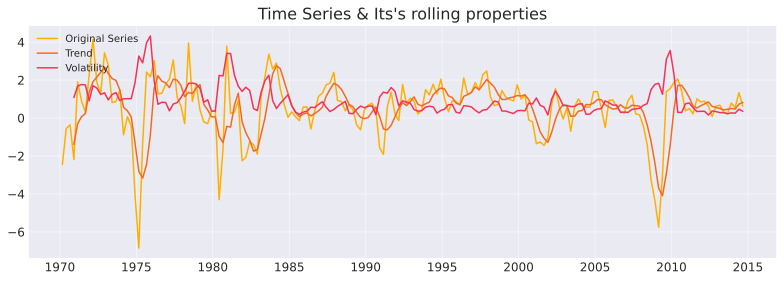

In [228]:
jbv.plot_rolling_statistics(train, 'production')

## Interpretation:
- Seems to have some seasonality.
- Data is either stationary or have a non-constant trend.
- There might be heteroscadasticity.

## White noise band:
Using:

$2 \times \frac{1}{\sqrt{n}}$,

where n is the length of the data. Therefore white noise band: **~**${0.146}$.

# Stationarity Analysis:

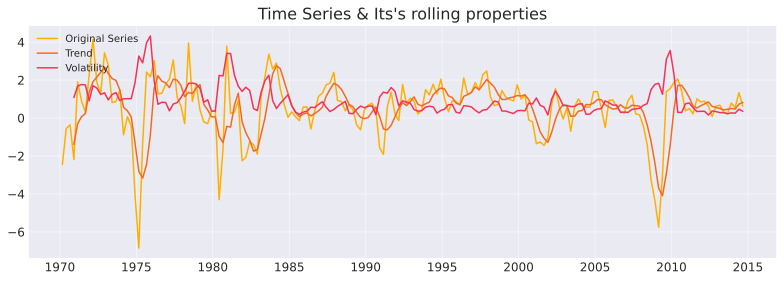

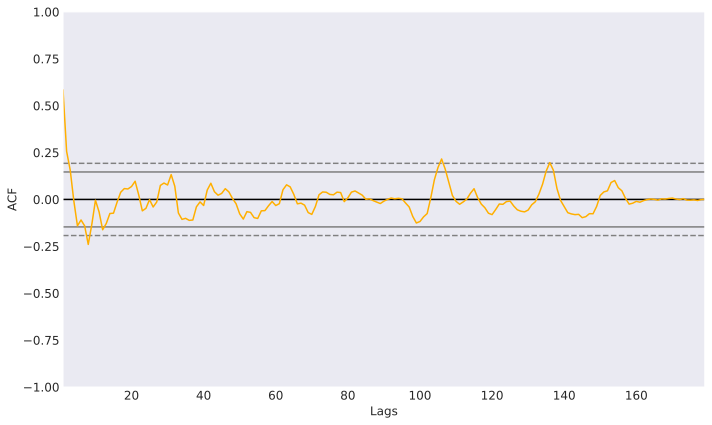

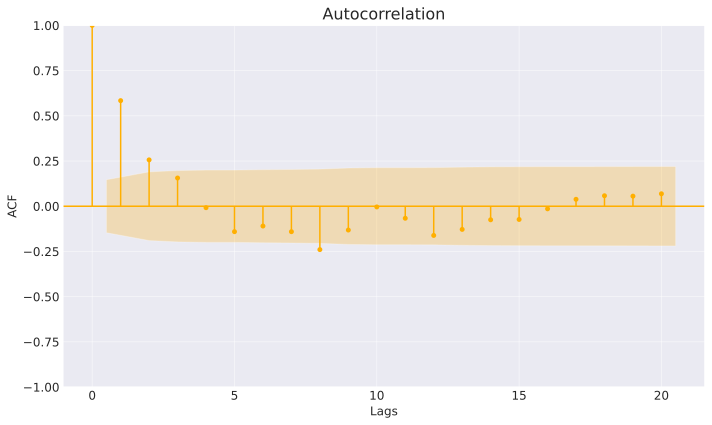

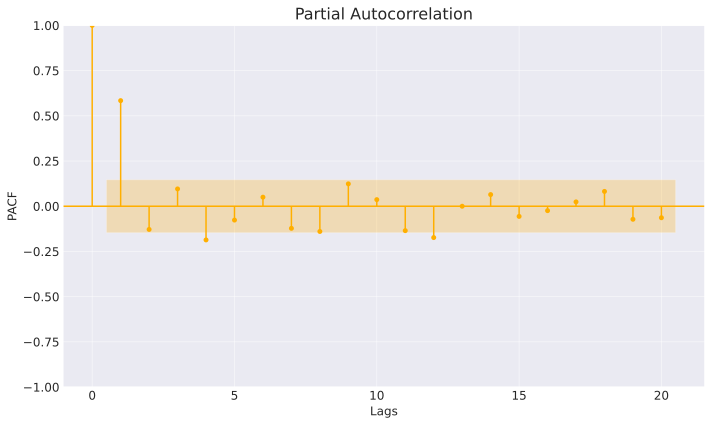

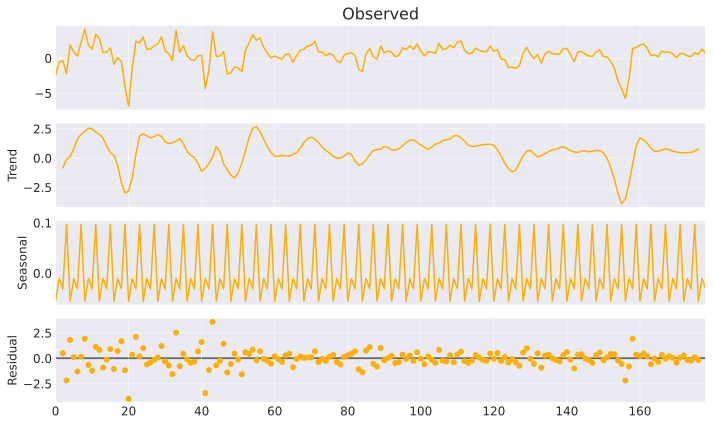

Augmented Dickey-Fuller Test: c
ADF Statistic: -6.907559509643596
p-value: 1.236021164882959e-09 

Augmented Dickey-Fuller Test: ct
ADF Statistic: -6.92924876838033
p-value: 2.0415073007930083e-08 

KPSS Test: c
KPSS Statistic: 0.0738622709859243
p-value: 0.1 

KPSS Test: ct
KPSS Statistic: 0.0738622709859243
p-value: 0.1 

recommended order of seasonal differencing : 
   OCSB recommendation : 0
    nCH recommendation : 0
{'stat_t': [-5.4531712921898565, 9.513179747336801], 'p_values_t': [1.7083305199898614e-07, 1.729218691770853e-17], 'stat_f': [58.583276227893435, 116.25767787043965, 93.81688972874525], 'p_values_f': [4.184486183624689e-20, 4.50835473094288e-41, 4.459009861676381e-42]}


In [229]:
test_unit_roots(train, lags=20, all="True")

## Interpretation:

Every tests and graphs are saying:

- The data doesn't have a trend.
- The data doesn't have a seasonal trend.

Therefore the data can be used for statistical modeling as is. This was expected since the data is about the change in the production rate in U.S.

# Model Selection:

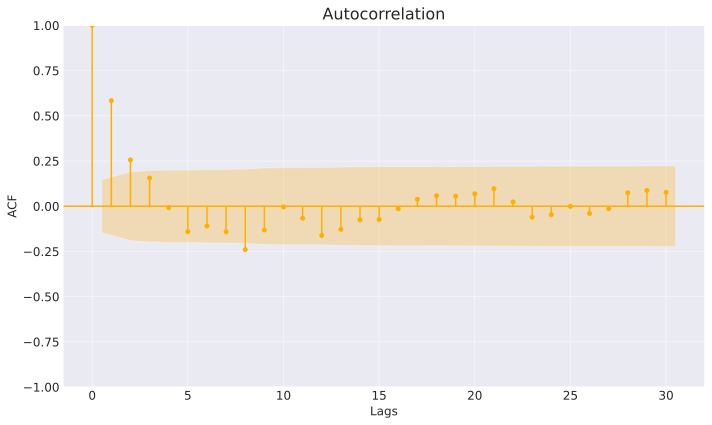

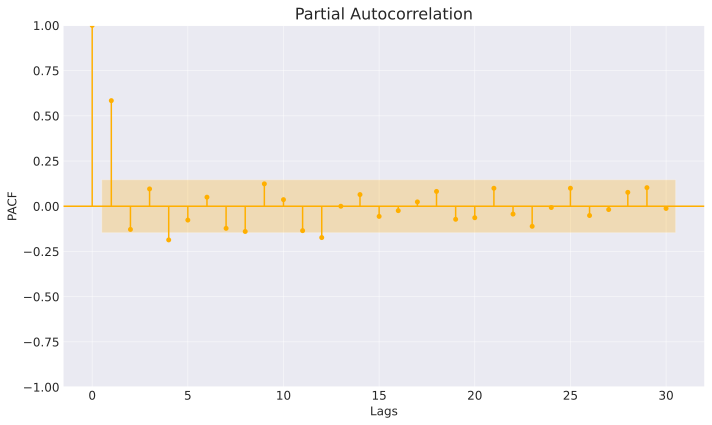

In [230]:
jbv.acf_pacf_plots(train, 'production', lags=30)

## Possible models:

- AR parameter: 1
- I parameter: 0
- MA parameter: {1, 3}
- SAR parameter: 0
- SI parameter: 0
- SMA parameter: 0

In [330]:
train_model_selection = train.to_pandas().set_index('date')

In [232]:
model_summary(train_model_selection['production'], (1,0,1), (0,0,0,4), trend=None)

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  179
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -293.361
Date:                Fri, 27 Dec 2024   AIC                            594.722
Time:                        20:58:32   BIC                            607.471
Sample:                    03-01-1970   HQIC                           599.891
                         - 09-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5179      0.216      2.396      0.017       0.094       0.942
ar.L1          0.3703      0.078      4.737      0.000       0.217       0.523
ma.L1          0.3416      0.087      3.918      0.0

In [233]:
model_summary(train_model_selection['production'], (1,0,3), (0,0,0,4), trend=None)

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  179
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -292.487
Date:                Fri, 27 Dec 2024   AIC                            596.973
Time:                        20:58:38   BIC                            616.098
Sample:                    03-01-1970   HQIC                           604.728
                         - 09-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5167      0.248      2.085      0.037       0.031       1.003
ar.L1          0.4193      0.339      1.236      0.216      -0.246       1.084
ma.L1          0.2661      0.344      0.774      0.4

## Selected model:

From the IC scores and the how well the model fits from the Ljing-Box and Jarque-Bera tests, the best model is:
    $$\text{SARIMA}(1,0,1)*(0,0,0)_4$$

# Diagnostics Checking:

In [234]:
arima_model = ARIMA(endog=train_model_selection['production'],
                order=(1,0,1), seasonal_order=(0,0,0,4), trend=None)
arima_model_fit = arima_model.fit()
residuals = pd.DataFrame(arima_model_fit.resid)

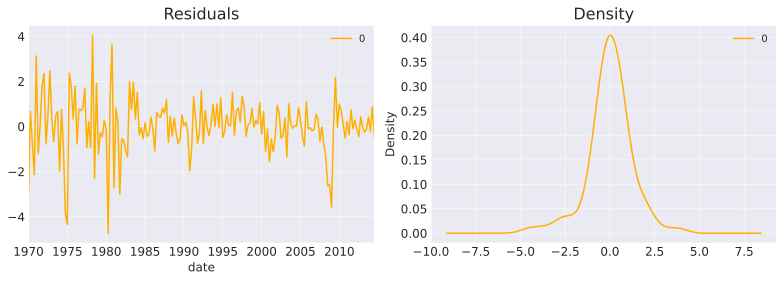

In [235]:
ja.basic_residual_plot_sm(residuals)

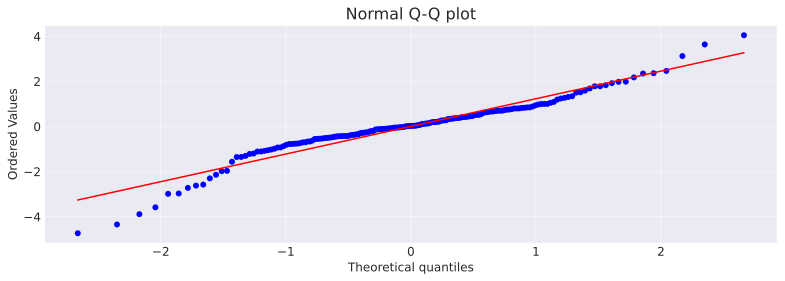

In [236]:
ja.basic_normal_qq_plot_sm(residuals[0])

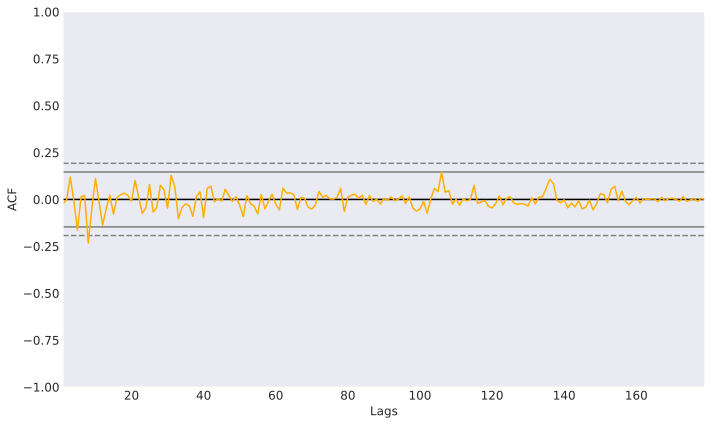

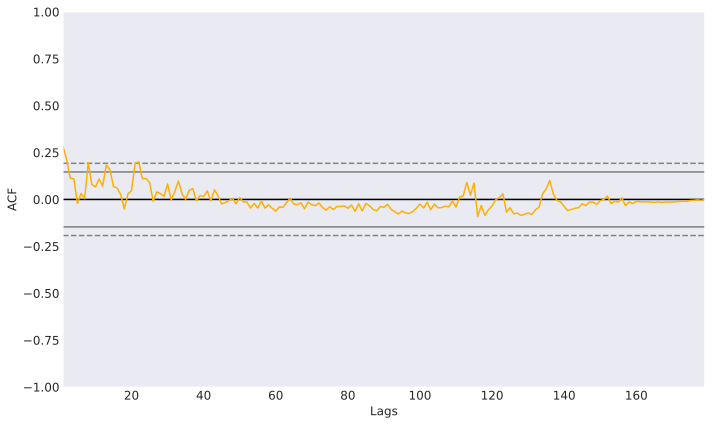

In [237]:
for i in [residuals, (residuals**2)]:
    jbv.acf_pacf_plots(i, 0, all=True)

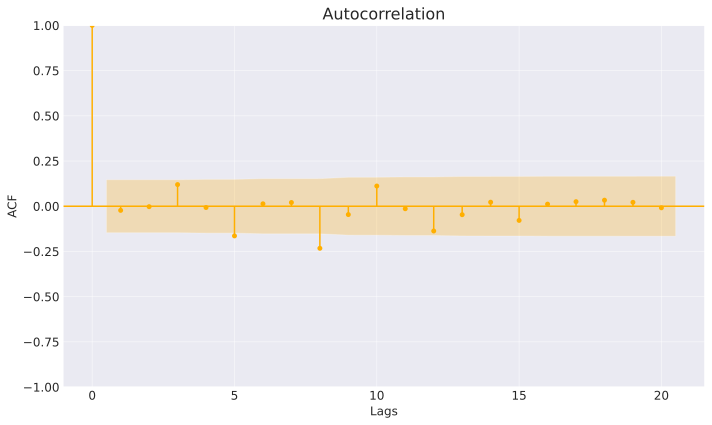

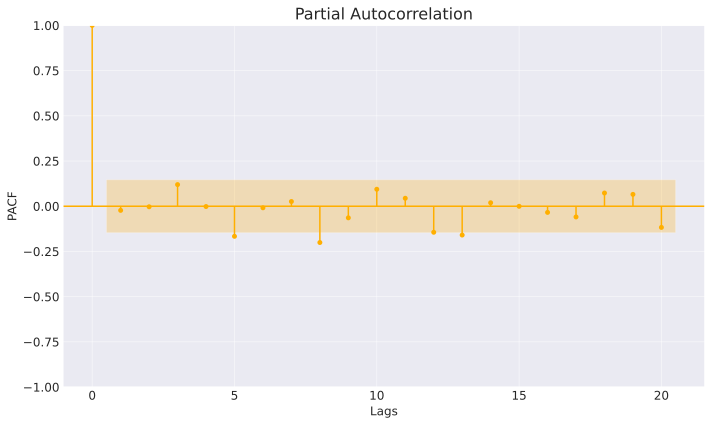

In [369]:
jbv.acf_pacf_plots(residuals, 0, lags=20)

In [239]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  179
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -293.361
Date:                Fri, 27 Dec 2024   AIC                            594.722
Time:                        20:59:06   BIC                            607.471
Sample:                    03-01-1970   HQIC                           599.891
                         - 09-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5179      0.216      2.396      0.017       0.094       0.942
ar.L1          0.3703      0.078      4.737      0.000       0.217       0.523
ma.L1          0.3416      0.087      3.918      0.000       0.171       0.513
sigma2         1.5481      0.117     13.285      0.000       1.320       1.777
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                60.21
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [240]:
lm_result = acorr_lm(residuals, period=5)

print('Lagrange Multiplier Test:')
print(f'LM Statistic: {lm_result[0]}')
print(f'p-value: {lm_result[1]} \n')

Lagrange Multiplier Test:
LM Statistic: 14.876422828216475
p-value: 0.13663263287347757 



In [241]:
arch_test = het_arch(residuals)
print('ARCH Test:')
print(f'LM Statistic: {arch_test[0]},\np-value: {arch_test[1]}')

ARCH Test:
LM Statistic: 27.44668518524489,
p-value: 0.002212270957427501


## Interpretation:

- Autocorrelation: From the Ljung-Box statistic, Lagrange Multiplier test, ACF and PACF the residuals doesn't seem have autocorrelation. Residuals act like white noise.
- Distribution: From the Q-Q plot, histogram and the Jarque-Bera statistic it is clear that the residuals are not normally distributed. They have heavy tails. Shows skewed t distribution behaviour.
- Heteroscedasticity: From the line graph and the ARCH Engle's test we can say that the data has heteroscedasticity. Therefore we will be using ARCH/GARCH models.

# Conditional Heteroscadasticity Modelling:

## GARCH model:

In [399]:
garch_model = arch_model(train_model_selection['production'], mean='AR', lags=[1,5,12,13], p=1, o=0, q=1, dist='t')
garch_model_fit = garch_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     52,   Neg. LLF: 6502.567433484919
Iteration:      8,   Func. Count:    100,   Neg. LLF: 237.79346218711416
Iteration:     12,   Func. Count:    143,   Neg. LLF: 378.2740562700483
Iteration:     16,   Func. Count:    186,   Neg. LLF: 228.88099980023082
Iteration:     20,   Func. Count:    227,   Neg. LLF: 228.5414645925406
Iteration:     24,   Func. Count:    267,   Neg. LLF: 228.52042992098114
Optimization terminated successfully    (Exit mode 0)
            Current function value: 228.52040273873314
            Iterations: 27
            Function evaluations: 297
            Gradient evaluations: 27


In [400]:
garch_model_fit

                              AR - GARCH Model Results                              
Dep. Variable:                   production   R-squared:                       0.374
Mean Model:                              AR   Adj. R-squared:                  0.358
Vol Model:                            GARCH   Log-Likelihood:               -228.520
Distribution:      Standardized Student's t   AIC:                           475.041
Method:                  Maximum Likelihood   BIC:                           503.049
                                              No. Observations:                  166
Date:                      Fri, Dec 27 2024   Df Residuals:                      161
Time:                              21:21:14   Df Model:                            5
                                   Mean Model                                  
                     coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------

## GJR-GARCH model:

In [378]:
gjr_model = arch_model(train_model_selection['production'], mean='AR', lags=[1,5], p=0, o=1, q=1, dist='t')
gjr_model_fit = gjr_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     42,   Neg. LLF: 559.2486699682722
Iteration:      8,   Func. Count:     80,   Neg. LLF: 243.9932777754449
Iteration:     12,   Func. Count:    113,   Neg. LLF: 243.54335496228794
Iteration:     16,   Func. Count:    145,   Neg. LLF: 243.4424865530051
Iteration:     20,   Func. Count:    177,   Neg. LLF: 243.4212572718219
Optimization terminated successfully    (Exit mode 0)
            Current function value: 243.42123400316
            Iterations: 22
            Function evaluations: 193
            Gradient evaluations: 22


In [379]:
gjr_model_fit

                            AR - GJR-GARCH Model Results                            
Dep. Variable:                   production   R-squared:                       0.380
Mean Model:                              AR   Adj. R-squared:                  0.373
Vol Model:                        GJR-GARCH   Log-Likelihood:               -243.421
Distribution:      Standardized Student's t   AIC:                           500.842
Method:                  Maximum Likelihood   BIC:                           522.956
                                              No. Observations:                  174
Date:                      Fri, Dec 27 2024   Df Residuals:                      171
Time:                              21:14:15   Df Model:                            3
                                  Mean Model                                  
                    coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------------------------------------------------------------

# Forecasting:

### ARIMA:

In [380]:
arima_model = ARIMA(endog=train_model_selection['production'],
                order=(1,0,1), seasonal_order=(0,0,0,4), trend=None)
arima_model_fit = arima_model.fit()

In [381]:
arima_output = arima_model_fit.get_forecast(steps=len(test))
arima_output = arima_output.summary_frame()
arima_predictions = arima_output['mean']

In [382]:
arima_predictions

2014-12-01    0.386309
2015-03-01    0.469186
2015-06-01    0.499872
2015-09-01    0.511235
2015-12-01    0.515442
2016-03-01    0.517000
2016-06-01    0.517576
2016-09-01    0.517790
Freq: QS-DEC, Name: mean, dtype: float64

### GARCH:

In [401]:
garch_model = arch_model(train_model_selection['production'], mean='AR', lags=[1,5,12,13], p=1, o=0, q=1, dist='t')
garch_model_fit = garch_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     52,   Neg. LLF: 6502.567433484919
Iteration:      8,   Func. Count:    100,   Neg. LLF: 237.79346218711416
Iteration:     12,   Func. Count:    143,   Neg. LLF: 378.2740562700483
Iteration:     16,   Func. Count:    186,   Neg. LLF: 228.88099980023082
Iteration:     20,   Func. Count:    227,   Neg. LLF: 228.5414645925406
Iteration:     24,   Func. Count:    267,   Neg. LLF: 228.52042992098114
Optimization terminated successfully    (Exit mode 0)
            Current function value: 228.52040273873314
            Iterations: 27
            Function evaluations: 297
            Gradient evaluations: 27


In [402]:
garch_output = garch_model_fit.forecast(horizon=len(test))
garch_predictions = garch_output.mean.values[0]

In [403]:
garch_predictions

array([0.72169979, 0.69842775, 0.74033702, 0.71146741, 0.66712699,
       0.67764835, 0.72647219, 0.72290142])

### GJR-GARCH:

In [386]:
gjr_model = arch_model(train_model_selection['production'], vol='GARCH', mean='AR', lags=[1,5], p=0, o=1, q=1, power=2.0, dist='t')
gjr_model_fit = gjr_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     42,   Neg. LLF: 559.2486699682722
Iteration:      8,   Func. Count:     80,   Neg. LLF: 243.9932777754449
Iteration:     12,   Func. Count:    113,   Neg. LLF: 243.54335496228794
Iteration:     16,   Func. Count:    145,   Neg. LLF: 243.4424865530051
Iteration:     20,   Func. Count:    177,   Neg. LLF: 243.4212572718219
Optimization terminated successfully    (Exit mode 0)
            Current function value: 243.42123400316
            Iterations: 22
            Function evaluations: 193
            Gradient evaluations: 22


In [387]:
gjr_output = gjr_model_fit.forecast(horizon=len(test))
gjr_predictions = gjr_output.mean.values[0]

In [388]:
gjr_predictions

array([0.67733713, 0.64269735, 0.65179352, 0.56526001, 0.59984901,
       0.61286557, 0.62412065, 0.62933051])

## Plot forecasts:

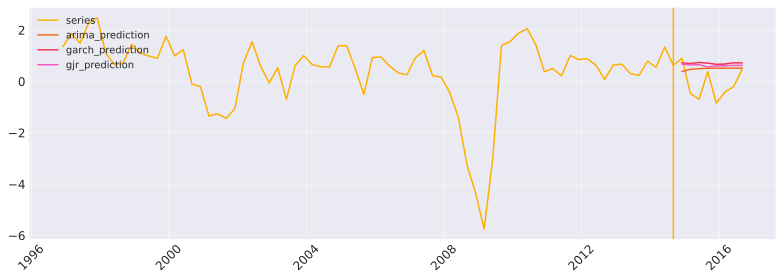

In [404]:
plt.figure(figsize=(11,4))
plt.plot(us_production['date'][-80:], us_production['production'][-80:], label='series')
plt.plot(arima_predictions.index, arima_predictions, label='arima_prediction')
plt.plot(arima_predictions.index, garch_predictions, label='garch_prediction')
plt.plot(arima_predictions.index, gjr_predictions, label='gjr_prediction')
plt.axvline(train['date'][-1])
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [405]:
# evaluate forecasts
for predictions in [arima_predictions, garch_predictions, gjr_predictions]:
    score = math.sqrt(mean_squared_error(predictions, test['production']))
    print('Test RMSE: %.3f' %score)

Test RMSE: 0.855
Test RMSE: 0.999
Test RMSE: 0.935


### Comparing RMSE score:
    
    - ARIMA: 0.855
    - GARCH: 0.999
    - GJR-GARCH: 0.935

The predictions are quite close to the actual values, but we can see from the graph that the model is underfitting. It looks like couldn't capture the patterns present in the data. From the RMSE scores we can tell that ARIMA did better than the GARCH models but it is clear to us that one of the models is necessarily better than the other others since they are quite close to each other.